In [1]:
#meta 2/3/2022 Graph Analysis of Text
#book: Applied Text Analysis with Python
#authors: Benjamin Bengfort, Rebecca Bilbro, Tony Ojeda

In [2]:
import re
import networkx as nx
import matplotlib.pyplot as plt

from nltk.corpus import wordnet as wn

# Graph Analysis of Text
book `Applied Text Analysis with Python` - enabling language aware data products with ML.  
repo https://github.com/anyaconda/atap

## 0. Download Wordnet
Refer to https://www.nltk.org/data.html

NLTK comes with many corpora, toy grammars, trained models, etc. A complete list is posted at: https://www.nltk.org/nltk_data/

To install the data, first install NLTK (see https://www.nltk.org/install.html), then use NLTK’s data downloader.


In [3]:
import nltk
nltk.download('wordnet')

[nltk_data] Error loading wordnet: HTTP Error 401: Authorization
[nltk_data]     Required


False

## 1 Create a graph of synonyms using WordNet

In [4]:
def graph_synsets(terms, pos=wn.NOUN, depth=2):
    """
    Create a networkx graph of the given terms to the given depth.
    """

    G = nx.Graph(
        name="WordNet Synsets Graph for {}".format(", ".join(terms)), depth=depth,
    )

    def add_term_links(G, term, current_depth):
        for syn in wn.synsets(term):
            for name in syn.lemma_names():
                G.add_edge(term, name)
                if current_depth < depth:
                    add_term_links(G, name, current_depth+1)

    for term in terms:
        add_term_links(G, term, 0)

    return G


def draw_text_graph(G):
    plt.figure(figsize=(18,12))
    pos = nx.spring_layout(G, scale=18)
    nx.draw_networkx_nodes(G, pos, node_color="white", linewidths=0, node_size=500)
    nx.draw_networkx_labels(G, pos, font_size=10)
    nx.draw_networkx_edges(G, pos)
    plt.xticks([])
    plt.yticks([])


Name: WordNet Synsets Graph for trinket
Type: Graph
Number of nodes: 25
Number of edges: 49
Average degree:   3.9200


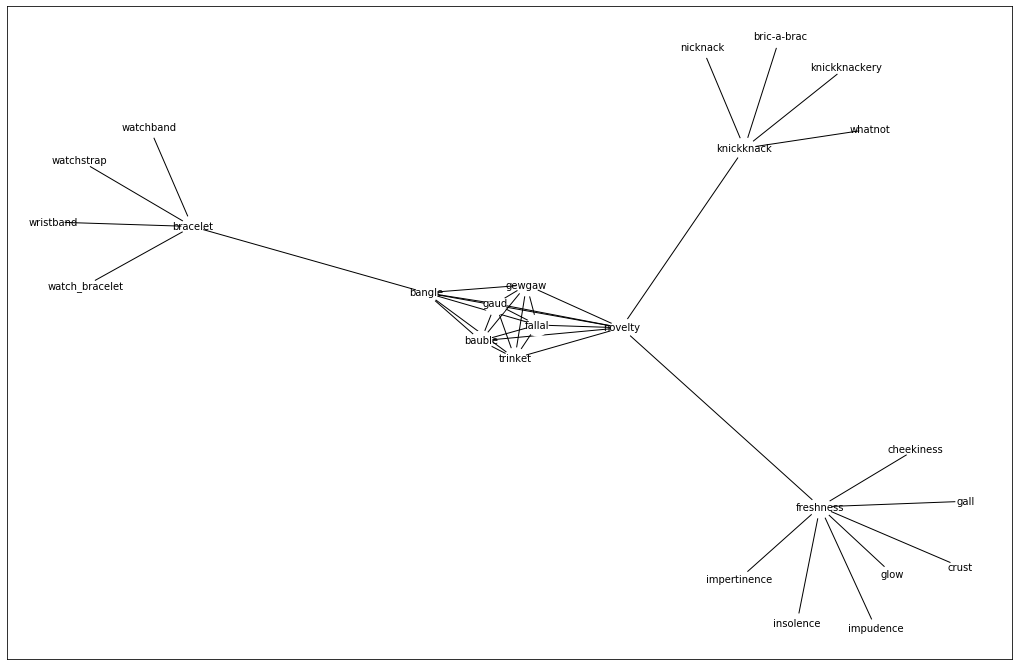

In [5]:
G = graph_synsets(["trinket"], depth=2)
draw_text_graph(G)

print(nx.info(G))

Name: WordNet Synsets Graph for trinket, souvenir
Type: Graph
Number of nodes: 40
Number of edges: 75
Average degree:   3.7500


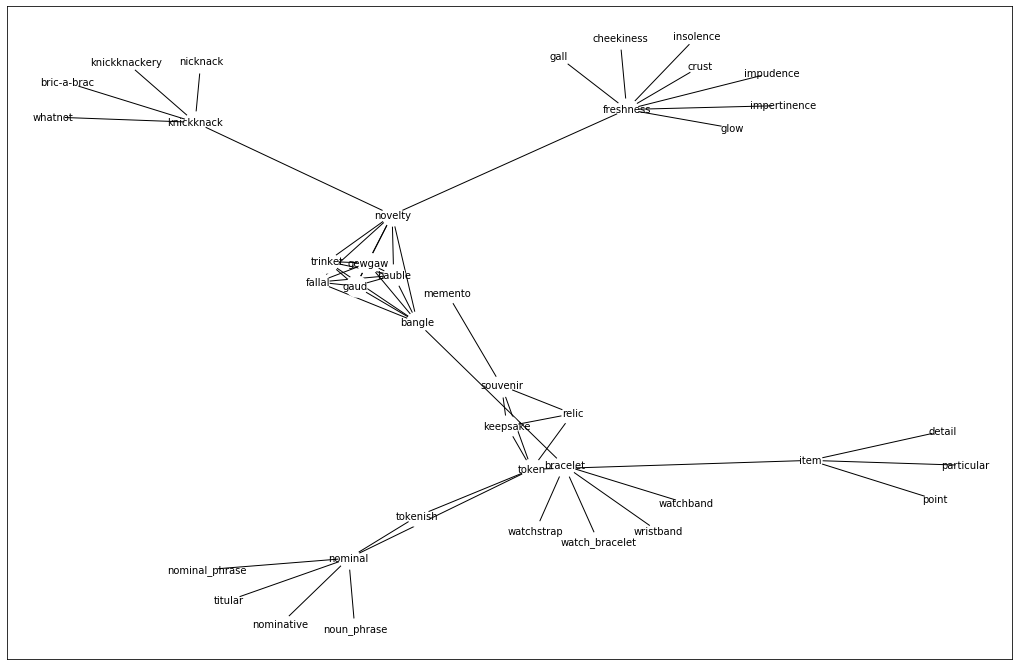

In [6]:
G = graph_synsets(["trinket", "souvenir"], depth=2)
draw_text_graph(G)

print(nx.info(G))

Name: WordNet Synsets Graph for cat, mouse
Type: Graph
Number of nodes: 1212
Number of edges: 2366
Average degree:   3.9043


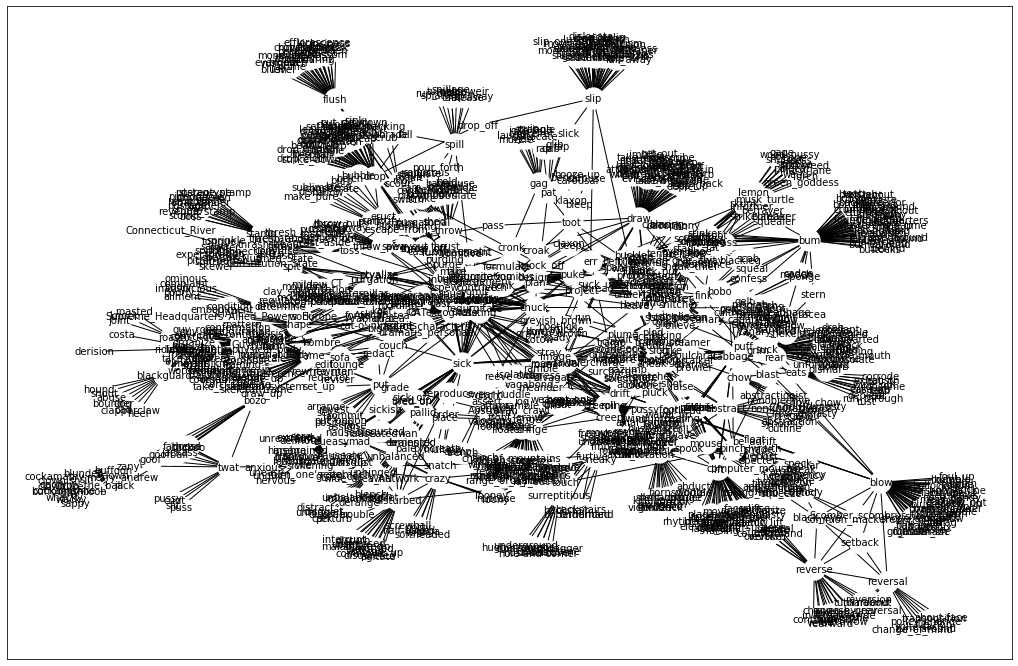

In [7]:
G = graph_synsets(["cat", "mouse"], depth=2)
draw_text_graph(G)

print(nx.info(G))

Name: WordNet Synsets Graph for jeans
Type: Graph
Number of nodes: 5
Number of edges: 13
Average degree:   5.2000


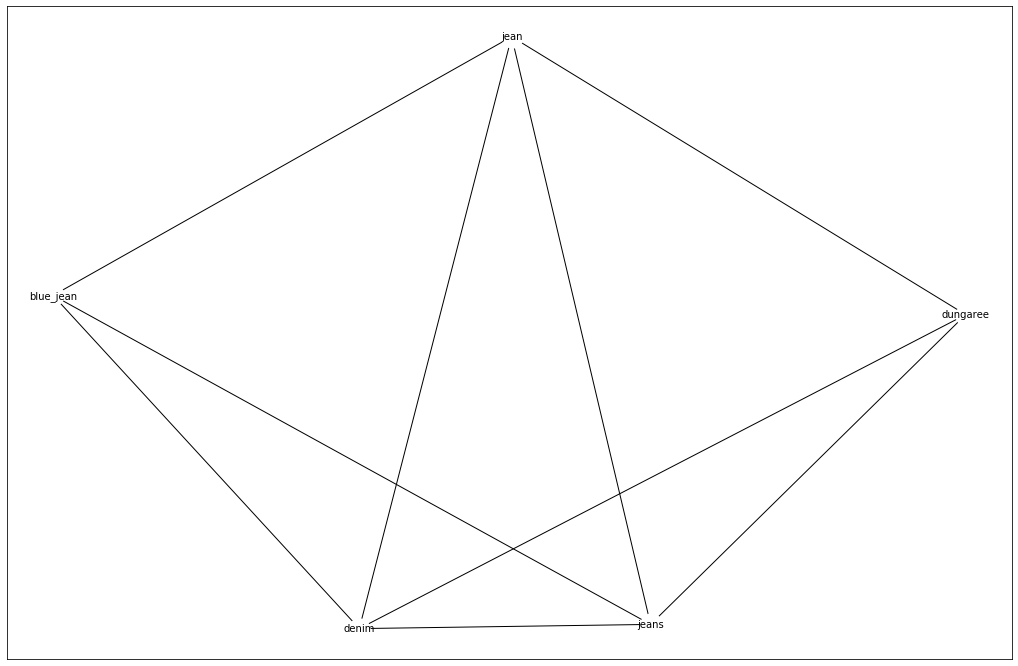

In [8]:
G = graph_synsets(["jeans"])
draw_text_graph(G)

print(nx.info(G))

Name: WordNet Synsets Graph for jeans, pants
Type: Graph
Number of nodes: 439
Number of edges: 715
Average degree:   3.2574


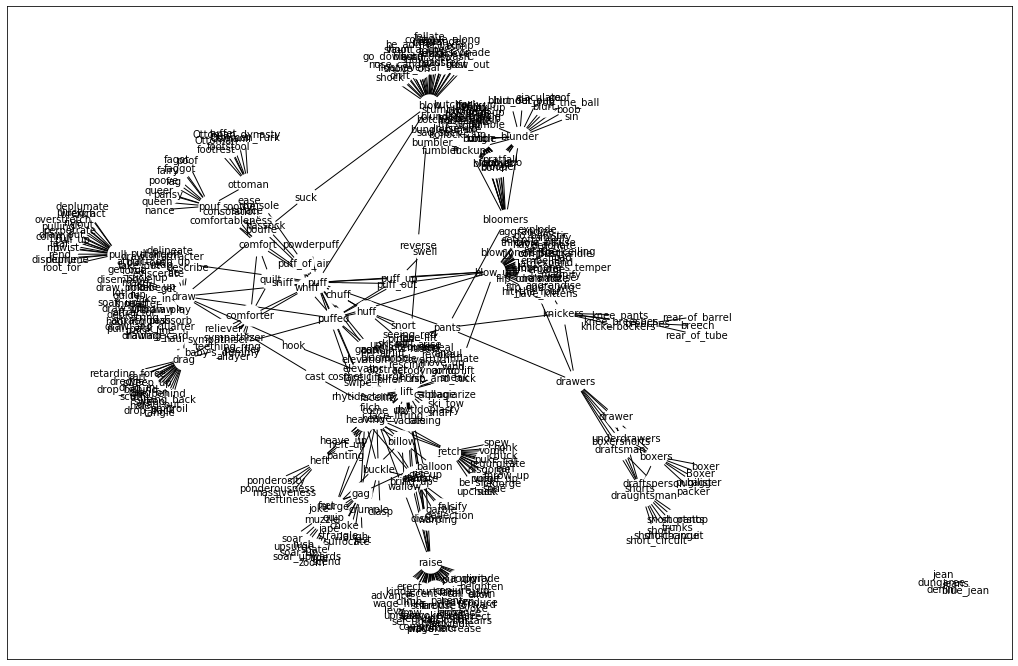

In [9]:
G = graph_synsets(["jeans", "pants"])
draw_text_graph(G)

print(nx.info(G))

## Xtra

In [10]:
mystop
#$xtra original code from Github
if __name__ == '__main__':
    import argparse

    # Create the argument parser
    parser = argparse.ArgumentParser(
        description="graph synonyms for a term",
    )

    parser.add_argument(
        '-d', '--depth', type=int, default=2, help="depth to extend graph",
    )
    parser.add_argument(
        '-o', '--outpath', type=str, default=None, help="file to write figure",
    )
    parser.add_argument(
        '-p', '--pos', type=str, default=wn.NOUN, help="part of speech of word(s)",
    )
    parser.add_argument(
        'words', nargs="+", help="the words to graph synonyms for",
    )

    # parse the arguments
    args = parser.parse_args()

    # run the graph computation
    try:
        G = graph_synsets(args.words, args.pos, args.depth)
        draw_text_graph(G)

        if args.outpath:
            plt.savefig(args.outpath)
        else:
            plt.show()

        print(nx.info(G))
    except Exception as e:
        parser.error(str(e))

NameError: name 'mystop' is not defined